In [1]:
import os
import sys
import numbers
import time
import math
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import stats as ss
%matplotlib inline
from matplotlib import pyplot as plt
import statsmodels
import statsmodels.api as sm
from scipy.stats import normaltest
import seaborn as sns
from neuralforecast import NeuralForecast as nf
from neuralforecast.models import LSTM, NHITS, RNN, NBEATS
from neuralforecast.losses.pytorch import DistributionLoss

In [2]:
day = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\nflstm\\data\\day_clean.csv')
week = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\nflstm\\data\\week_clean.csv')
month = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\nflstm\\data\\month_clean.csv')
hour = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\nflstm\\data\\hour_clean.csv')

In [3]:
alxm = pd.DataFrame(month, columns=['ds', 'alx'])
gcom = pd.DataFrame(month, columns=['ds', 'gco'])
mcom = pd.DataFrame(month, columns=['ds', 'mco'])

alxw = pd.DataFrame(week, columns=['ds', 'alx'])
gcow = pd.DataFrame(week, columns=['ds', 'gco'])
mcow = pd.DataFrame(week, columns=['ds', 'mco'])

alxd = pd.DataFrame(day, columns=['ds', 'alx'])
gcod = pd.DataFrame(day, columns=['ds', 'gco'])
mcod = pd.DataFrame(day, columns=['ds', 'mco'])

alxh = pd.DataFrame(hour, columns=['ds', 'alx'])
gcoh = pd.DataFrame(hour, columns=['ds', 'gco'])
mcoh = pd.DataFrame(hour, columns=['ds', 'mco'])

In [4]:
alxh['ds'] = pd.to_datetime(alxh['ds'])
gcoh['ds'] = pd.to_datetime(gcoh['ds'])
mcoh['ds'] = pd.to_datetime(mcoh['ds'])
alxd['ds'] = pd.to_datetime(alxd['ds'])
gcod['ds'] = pd.to_datetime(gcod['ds'])
mcod['ds'] = pd.to_datetime(mcod['ds'])
alxw['ds'] = pd.to_datetime(alxw['ds'])
gcow['ds'] = pd.to_datetime(gcow['ds'])
mcow['ds'] = pd.to_datetime(mcow['ds'])
alxm['ds'] = pd.to_datetime(alxm['ds'])
gcom['ds'] = pd.to_datetime(gcom['ds'])
mcom['ds'] = pd.to_datetime(mcom['ds'])

In [5]:
alxm.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
gcom.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
mcom.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)

alxw.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
gcow.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
mcow.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)

alxd.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
gcod.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
mcod.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)

alxh.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
gcoh.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
mcoh.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)

In [6]:
tr_alxm = alxm[:48]
tst_alxm = alxm[48:]

tr_gcom = gcom[:48]
tst_gcom = gcom[48:]

tr_mcom = mcom[:48]
tst_mcom = mcom[48:]

tr_alxw = alxw[:209]
tst_alxw = alxw[209:]

tr_gcow = gcow[:209]
tst_gcow = gcow[209:]

tr_mcow = mcow[:209]
tst_mcow = mcow[209:]

tr_alxd = alxd[:365]
tst_alxd = alxd[365:]

tr_gcod = alxd[:365]
tst_gcod = alxd[365:]

tr_mcod = mcod[:365]
tst_mcod = mcod[365:]

tr_alxh = alxh[:2184]
tst_alxh = alxh[2184:]

tr_gcoh = gcoh[:2184]
tst_gcoh = gcoh[2184:]

tr_mcoh = mcoh[:2184]
tst_mcoh = mcoh[2184:]

In [7]:
alxm_sf = alxm
alxm_sf.insert(0, "unique_id", "M")
tr_alxm_sf = alxm_sf[:48]
ts_alxm_sf = alxm_sf[48:]

gcom_sf = gcom
gcom_sf.insert(0, "unique_id", "M")
tr_gcom_sf = gcom_sf[:48]
ts_gcom_sf = gcom_sf[48:]

mcom_sf = mcom
mcom_sf.insert(0, "unique_id", "M")
tr_mcom_sf = mcom_sf[:48]
ts_mcom_sf = mcom_sf[48:]

alxw_sf = alxw
alxw_sf.insert(0, "unique_id", "W")
tr_alxw_sf = alxw_sf[:209]
ts_alxw_sf = alxw_sf[209:]

gcow_sf = gcow
gcow_sf.insert(0, "unique_id", "W")
tr_gcow_sf = gcow_sf[:209]
ts_gcow_sf = gcow_sf[209:]

mcow_sf = mcow
mcow_sf.insert(0, "unique_id", "W")
tr_mcow_sf = mcow_sf[:209]
ts_mcow_sf = mcow_sf[209:]

alxd_sf = alxd
alxd_sf.insert(0, "unique_id", "D")
tr_alxd_sf = alxd_sf[:365]
ts_alxd_sf = alxd_sf[365:]

gcod_sf = gcod
gcod_sf.insert(0, "unique_id", "D")
tr_gcod_sf = gcod_sf[:365]
ts_gcod_sf = gcod_sf[365:]

mcod_sf = mcod
mcod_sf.insert(0, "unique_id", "D")
tr_mcod_sf = mcod_sf[:365]
ts_mcod_sf = mcod_sf[365:]

alxh_sf = alxh
alxh_sf.insert(0, "unique_id", "H")
tr_alxh_sf = alxh_sf[:2184]
ts_alxh_sf = alxh_sf[2184:]

gcoh_sf = gcoh
gcoh_sf.insert(0, "unique_id", "H")
tr_gcoh_sf = gcoh_sf[:2184]
ts_gcoh_sf = gcoh_sf[2184:]

mcoh_sf = mcoh
mcoh_sf.insert(0, "unique_id", "H")
tr_mcoh_sf = mcoh_sf[:2184]
ts_mcoh_sf = mcoh_sf[2184:]

In [8]:
m_models = [
    LSTM(
        h=12,
        loss=DistributionLoss(distribution='Normal', level=[90]),
        max_steps=1000,
        encoder_n_layers=2,
        encoder_hidden_size=200,
        context_size=10,
        decoder_hidden_size=200,
        decoder_layers=2,
        learning_rate=1e-3,
        scaler_type='standard'
    )
]

Seed set to 1


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 24.1 K | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
510 K     Trainable params
3         Non-trainable params
510 K     Total params
2.043     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

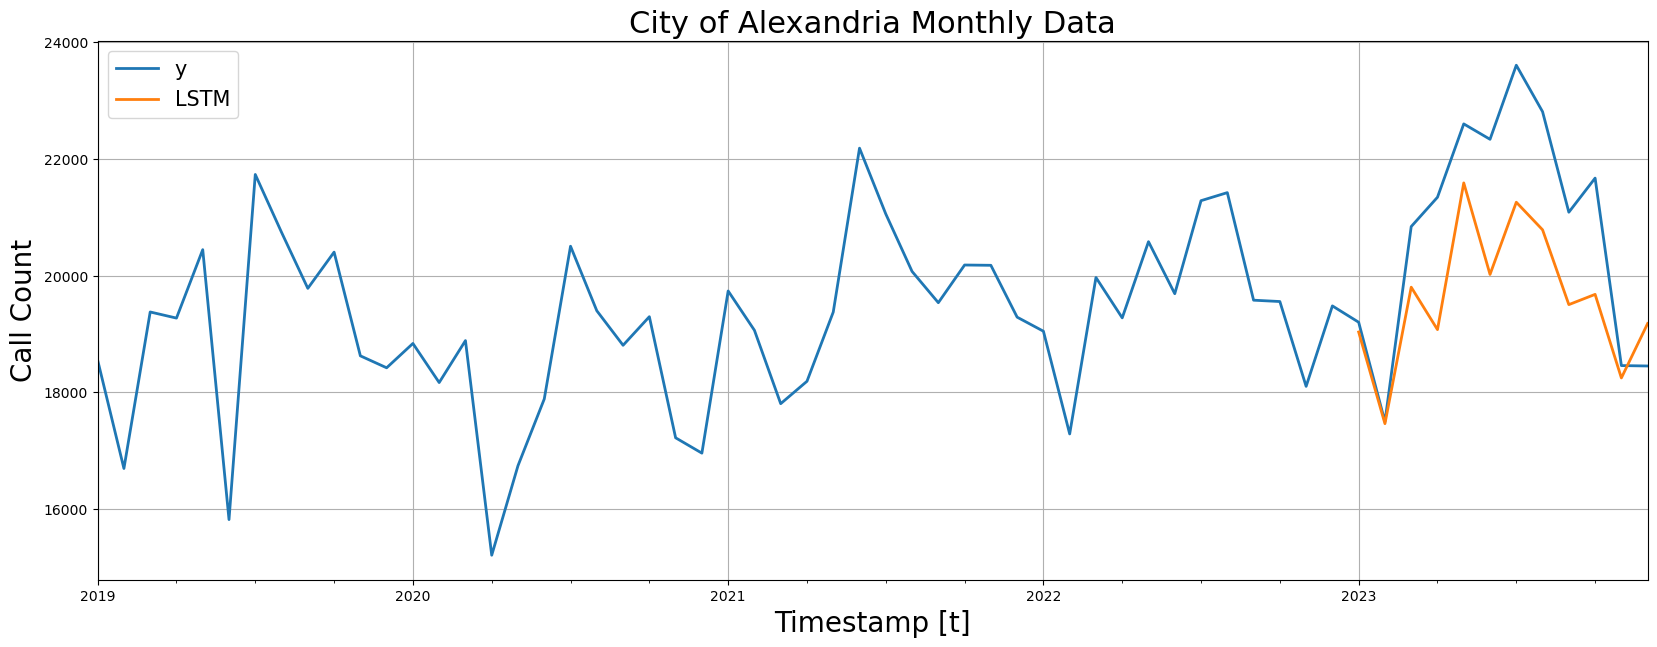

In [9]:
alxm_model = nf(models=m_models, freq='MS')
alxm_model.fit(tr_alxm_sf)
alxm_fcst1 = alxm_model.predict(futr_df=ts_alxm_sf)
alxm_fcst1 = alxm_fcst1.merge(ts_alxm_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([tr_alxm_sf, alxm_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('City of Alexandria Monthly Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 24.1 K | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
510 K     Trainable params
3         Non-trainable params
510 K     Total params
2.043     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

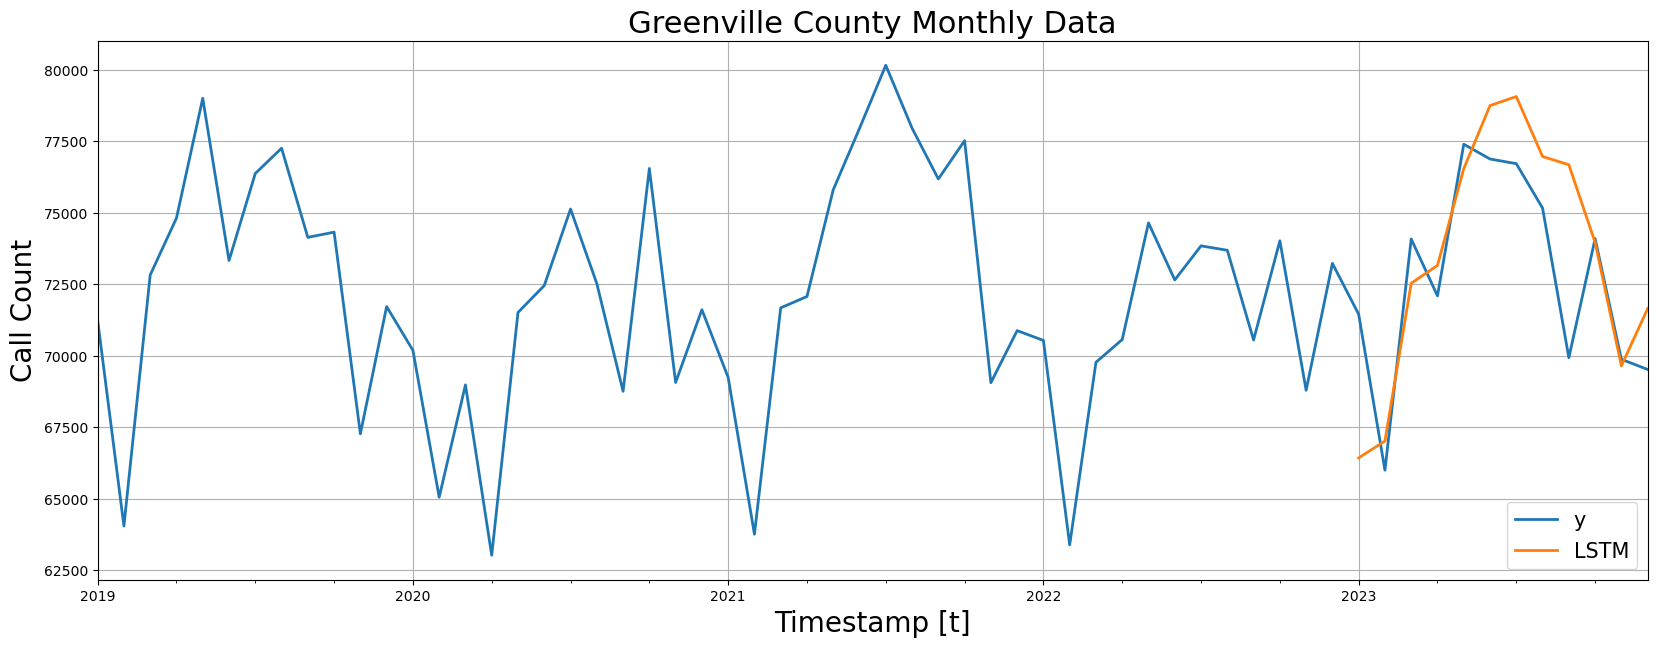

In [10]:
gcom_model = nf(models=m_models, freq='MS')

gcom_model.fit(tr_gcom_sf)

gcom_fcst1 = gcom_model.predict(futr_df=ts_gcom_sf)

gcom_fcst1 = gcom_fcst1.merge(ts_gcom_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([tr_gcom_sf, gcom_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('Greenville County Monthly Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 24.1 K | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
510 K     Trainable params
3         Non-trainable params
510 K     Total params
2.043     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

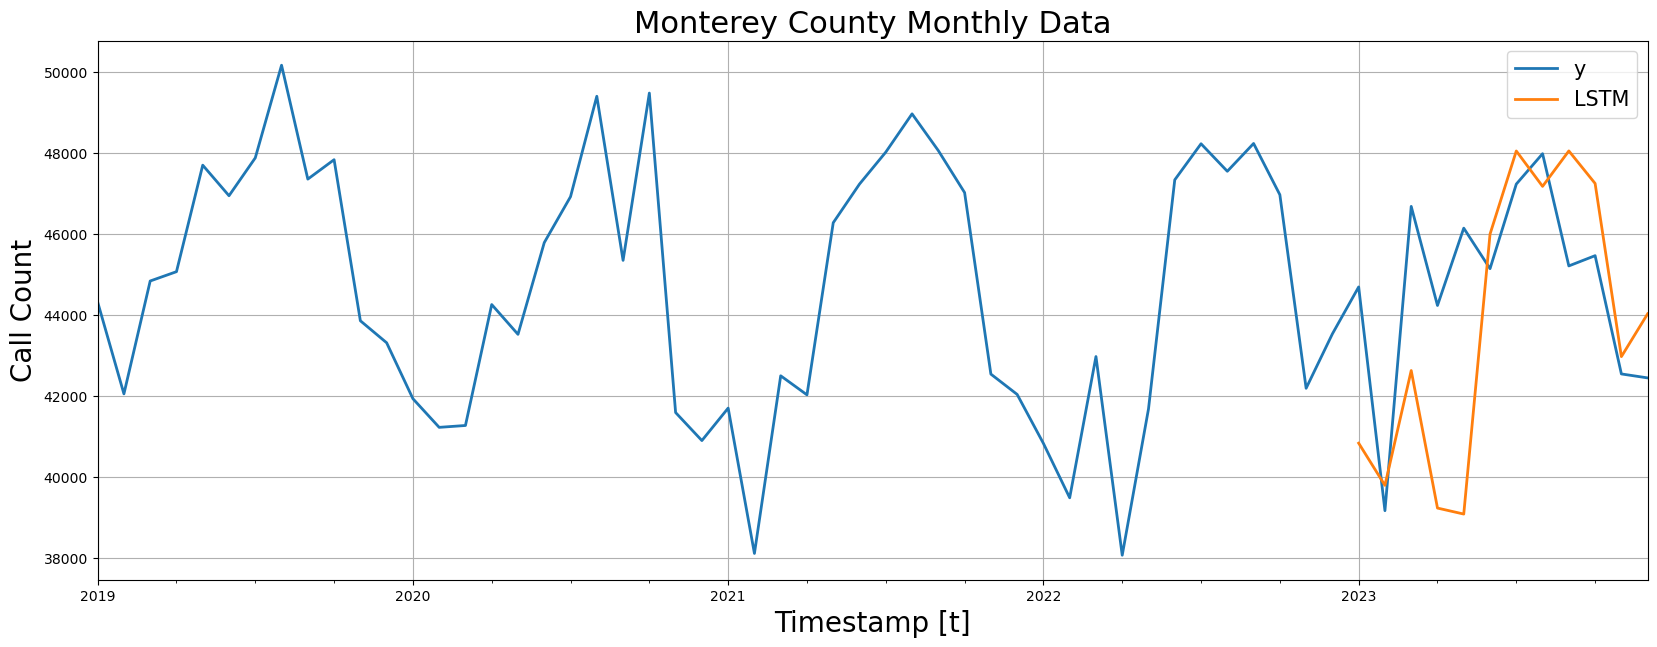

In [11]:
mcom_model = nf(models=m_models, freq='MS')

mcom_model.fit(tr_mcom_sf)

mcom_fcst1 = mcom_model.predict(futr_df=ts_mcom_sf)

mcom_fcst1 = mcom_fcst1.merge(ts_mcom_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([tr_mcom_sf, mcom_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('Monterey County Monthly Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [12]:
w_models = [
    LSTM(
        h=52,
        loss=DistributionLoss(distribution='Normal', level=[90]),
        max_steps=1000,
        encoder_n_layers=2,
        encoder_hidden_size=200,
        context_size=10,
        decoder_hidden_size=200,
        decoder_layers=2,
        learning_rate=1e-3,
        scaler_type='standard'
    )
]

Seed set to 1


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 104 K  | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
591 K     Trainable params
3         Non-trainable params
591 K     Total params
2.365     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

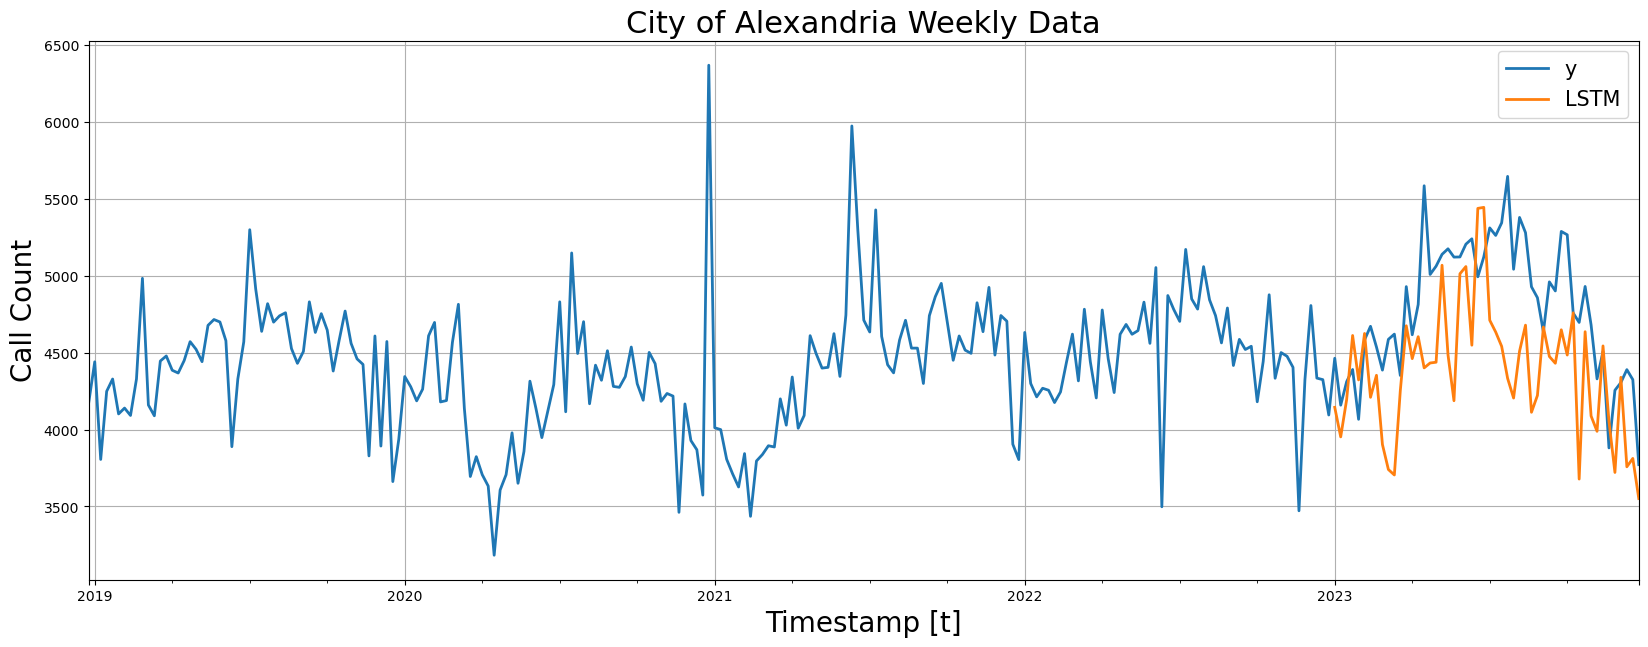

In [13]:
alxw_model = nf(models=w_models, freq='W')

alxw_model.fit(tr_alxw_sf)

alxw_fcst1 = alxw_model.predict(futr_df=ts_alxw_sf)

alxw_fcst1 = alxw_fcst1.merge(ts_alxw_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([tr_alxw_sf, alxw_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('City of Alexandria Weekly Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 104 K  | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
591 K     Trainable params
3         Non-trainable params
591 K     Total params
2.365     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

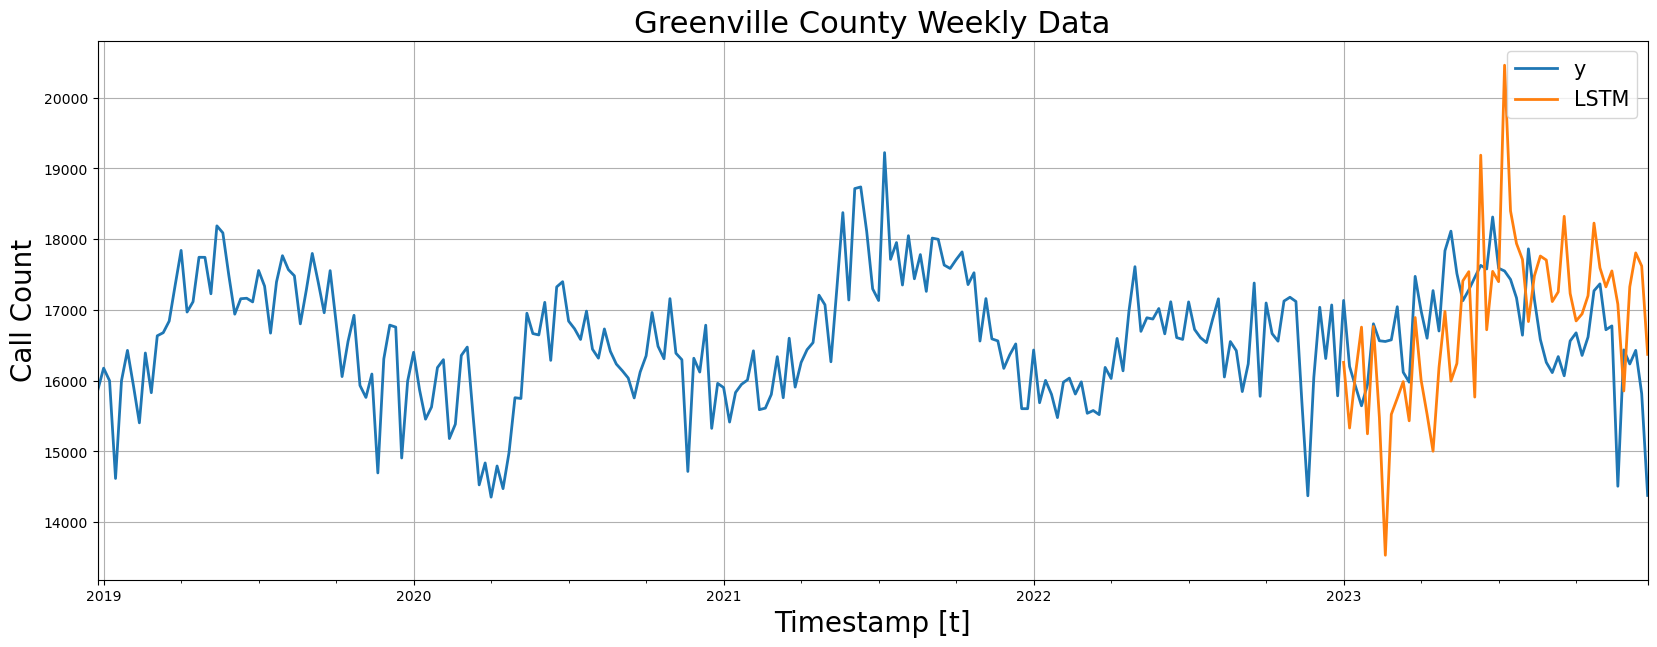

In [14]:
gcow_model = nf(models=w_models, freq='W')

gcow_model.fit(tr_gcow_sf)

gcow_fcst1 = gcow_model.predict(futr_df=ts_gcow_sf)

gcow_fcst1 = gcow_fcst1.merge(ts_gcow_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([tr_gcow_sf, gcow_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('Greenville County Weekly Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 104 K  | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
591 K     Trainable params
3         Non-trainable params
591 K     Total params
2.365     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

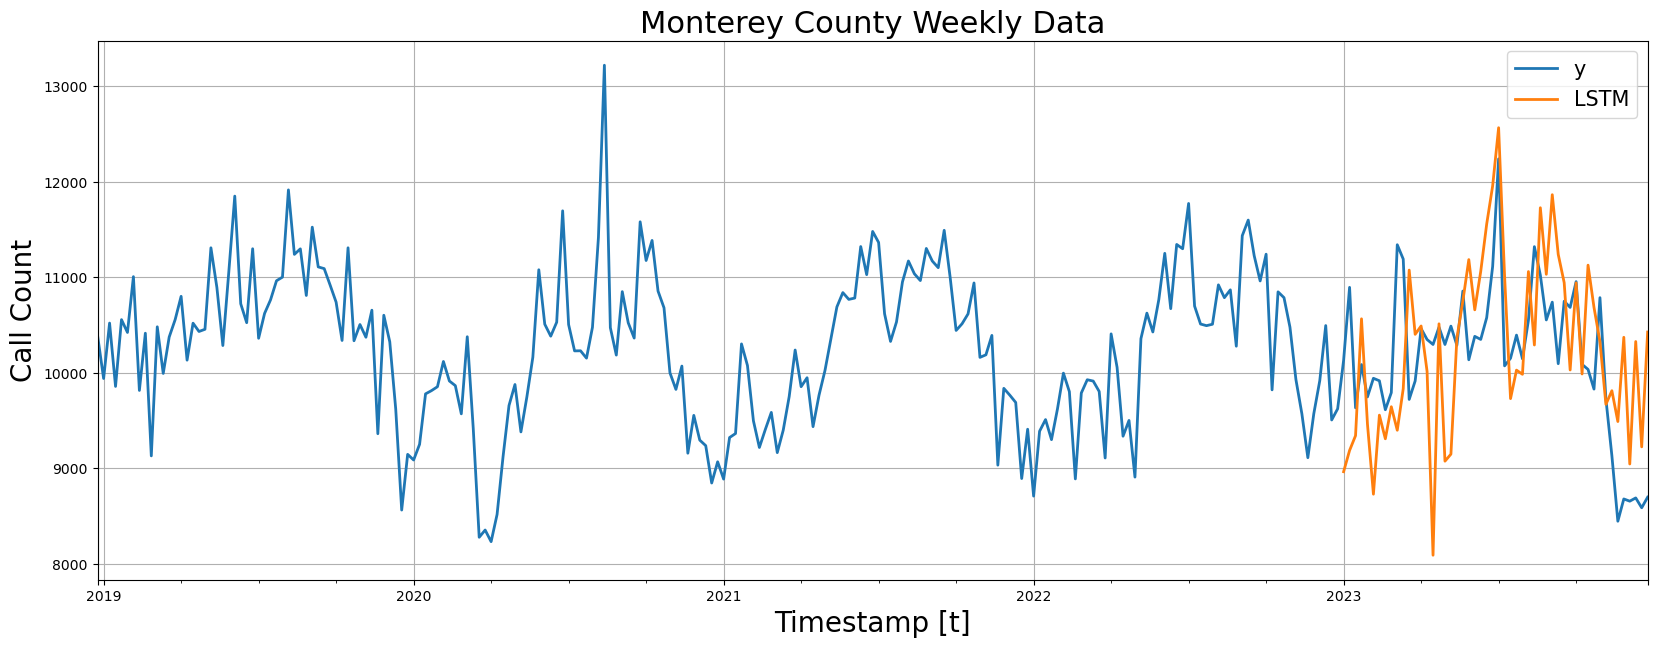

In [15]:
mcow_model = nf(models=w_models, freq='W')

mcow_model.fit(tr_mcow_sf)

mcow_fcst1 = mcow_model.predict(futr_df=ts_mcow_sf)

mcow_fcst1 = mcow_fcst1.merge(ts_mcow_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([tr_mcow_sf, mcow_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('Monterey County Weekly Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [16]:
d_models = [
    LSTM(
        h=90,
        loss=DistributionLoss(distribution='Normal', level=[95]),
        max_steps=1000,
        encoder_n_layers=2,
        encoder_hidden_size=200,
        context_size=10,
        decoder_hidden_size=200,
        decoder_layers=2,
        learning_rate=1e-3,
        scaler_type='standard'
    )
]

Seed set to 1


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 180 K  | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
667 K     Trainable params
3         Non-trainable params
667 K     Total params
2.670     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

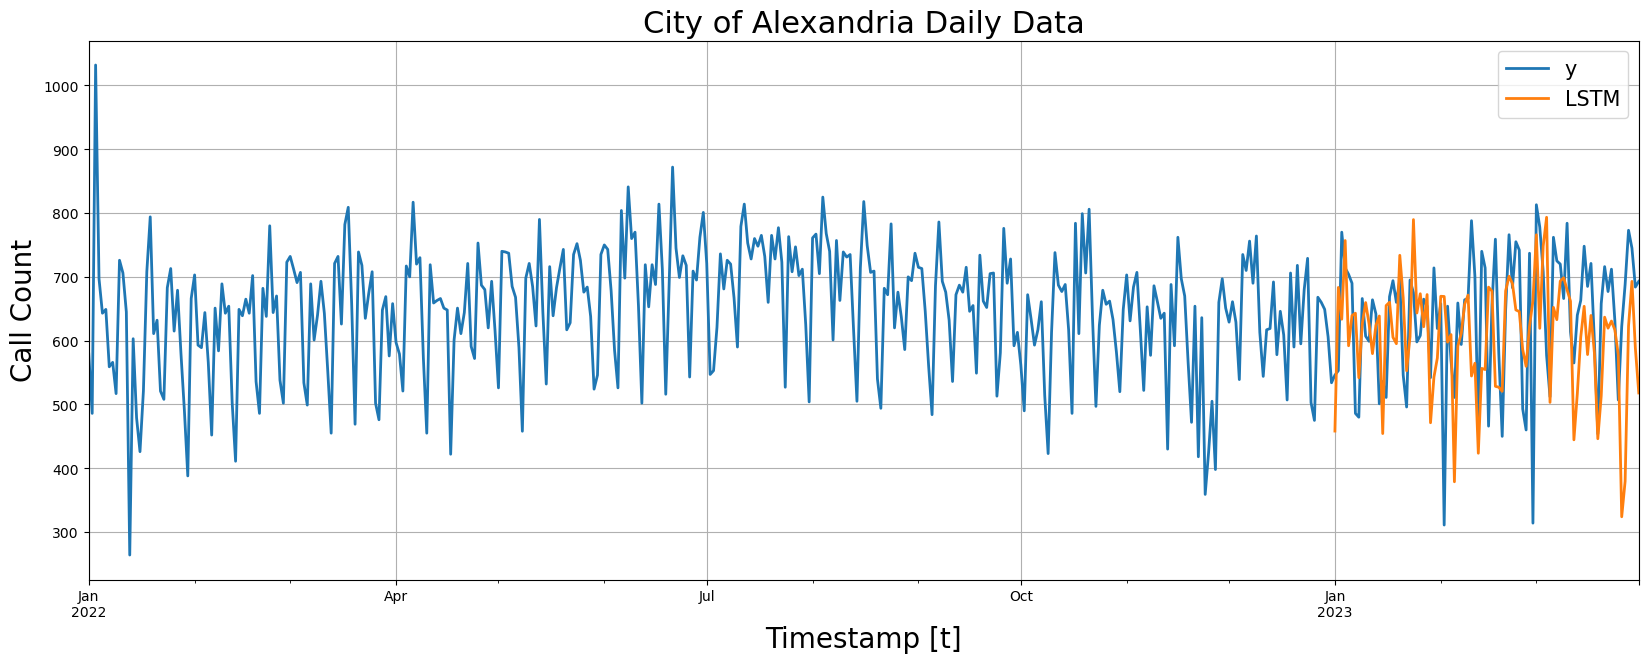

In [17]:
alxd_model = nf(models=d_models, freq='D')

alxd_model.fit(tr_alxd_sf)

alxd_fcst1 = alxd_model.predict(futr_df=ts_alxd_sf)

alxd_fcst1 = alxd_fcst1.merge(ts_alxd_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([tr_alxd_sf, alxd_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('City of Alexandria Daily Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 180 K  | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
667 K     Trainable params
3         Non-trainable params
667 K     Total params
2.670     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

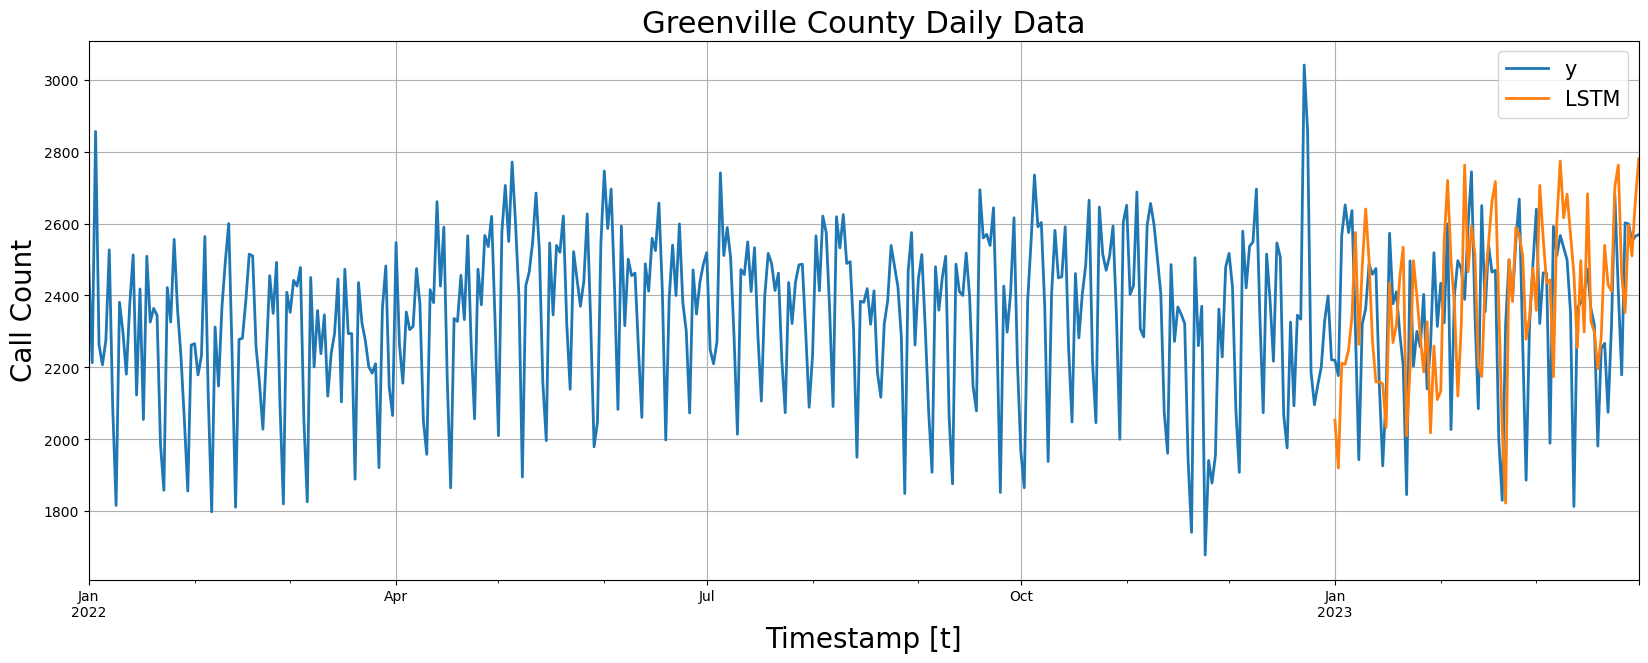

In [18]:
gcod_model = nf(models=d_models, freq='D')

gcod_model.fit(tr_gcod_sf)

gcod_fcst1 = gcod_model.predict(futr_df=ts_gcod_sf)

gcod_fcst1 = gcod_fcst1.merge(ts_gcod_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([tr_gcod_sf, gcod_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('Greenville County Daily Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 180 K  | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
667 K     Trainable params
3         Non-trainable params
667 K     Total params
2.670     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

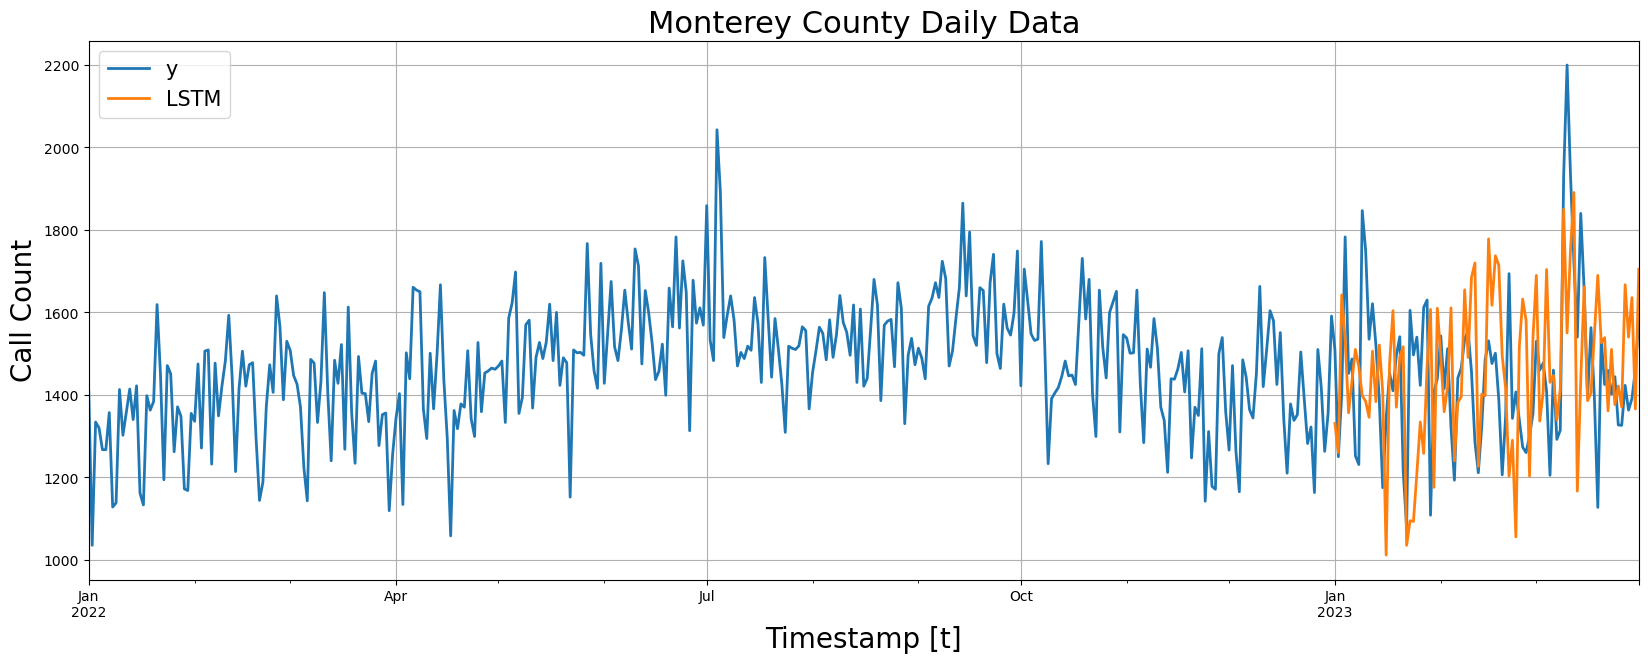

In [19]:
mcod_model = nf(models=d_models, freq='D')

mcod_model.fit(tr_mcod_sf)

mcod_fcst1 = mcod_model.predict(futr_df=ts_mcod_sf)

mcod_fcst1 = mcod_fcst1.merge(ts_mcod_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([tr_mcod_sf, mcod_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('Monterey County Daily Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [20]:
h_models = [
    LSTM(
        h=744,
        loss=DistributionLoss(distribution='Normal', level=[95]),
        max_steps=100,
        encoder_n_layers=2,
        encoder_hidden_size=200,
        context_size=10,
        decoder_hidden_size=200,
        decoder_layers=2,
        learning_rate=1e-3,
        scaler_type='standard'
    )
]

Seed set to 1


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 1.5 M  | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
2.0 M     Trainable params
3         Non-trainable params
2.0 M     Total params
7.928     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

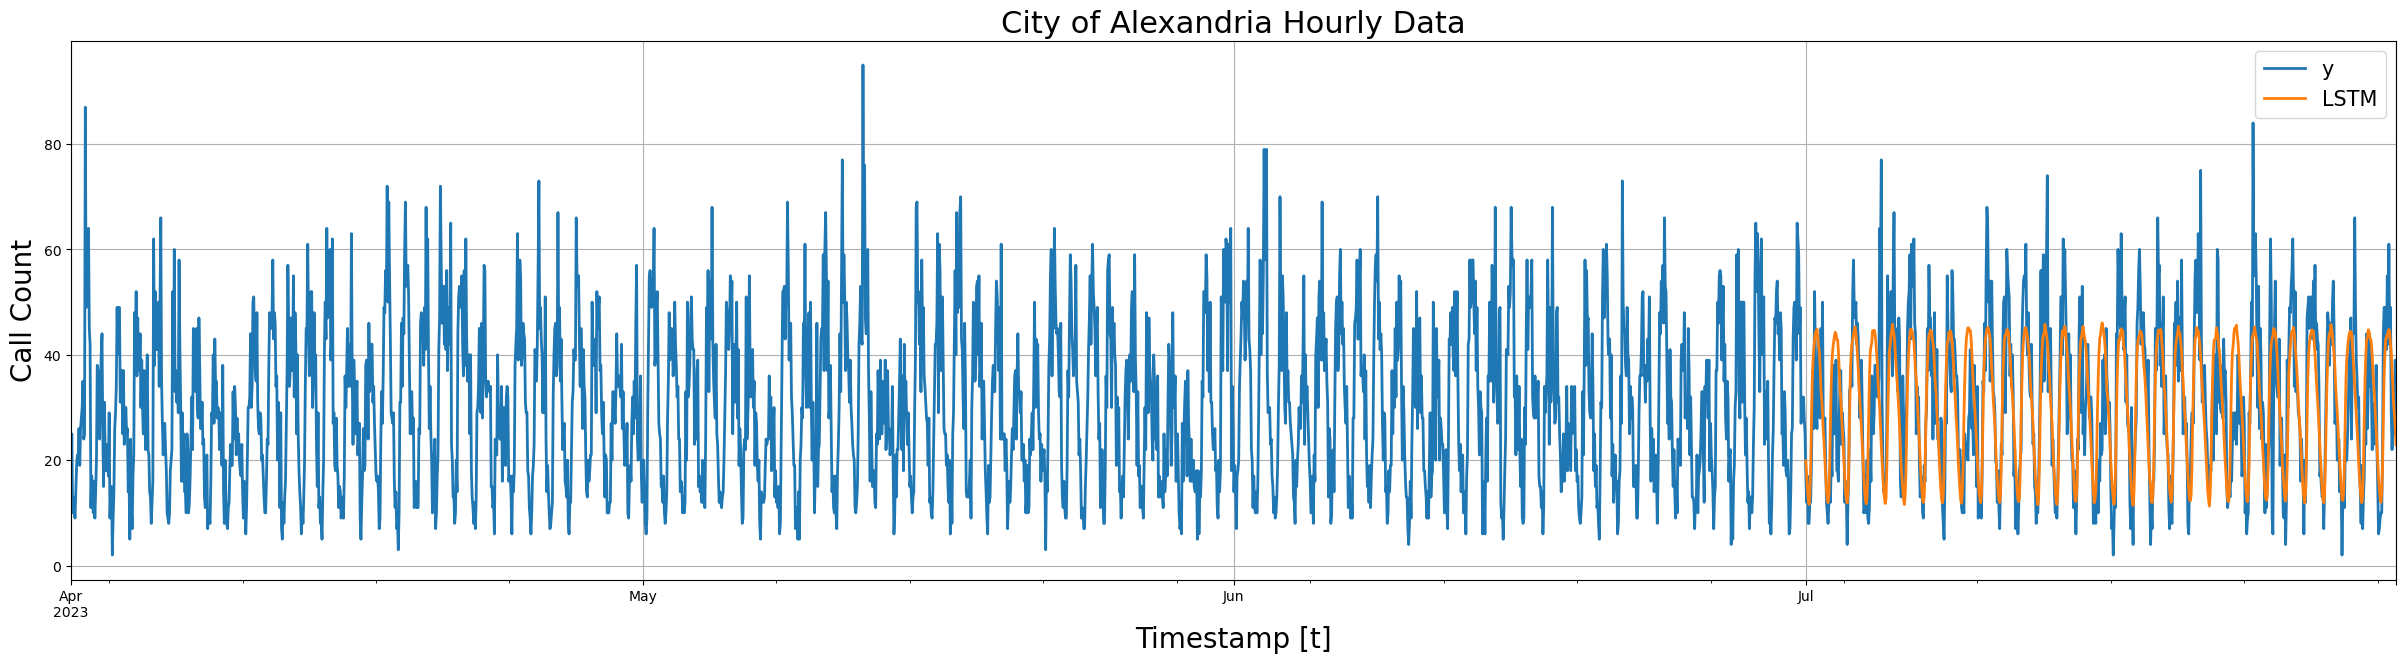

In [21]:
alxh_model = nf(models=h_models, freq='H')

alxh_model.fit(tr_alxh_sf)

alxh_fcst1 = alxh_model.predict(futr_df=ts_alxh_sf)

alxh_fcst1 = alxh_fcst1.merge(ts_alxh_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (30, 7))
plot_df = pd.concat([tr_alxh_sf, alxh_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('City of Alexandria Hourly Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 1.5 M  | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
2.0 M     Trainable params
3         Non-trainable params
2.0 M     Total params
7.928     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

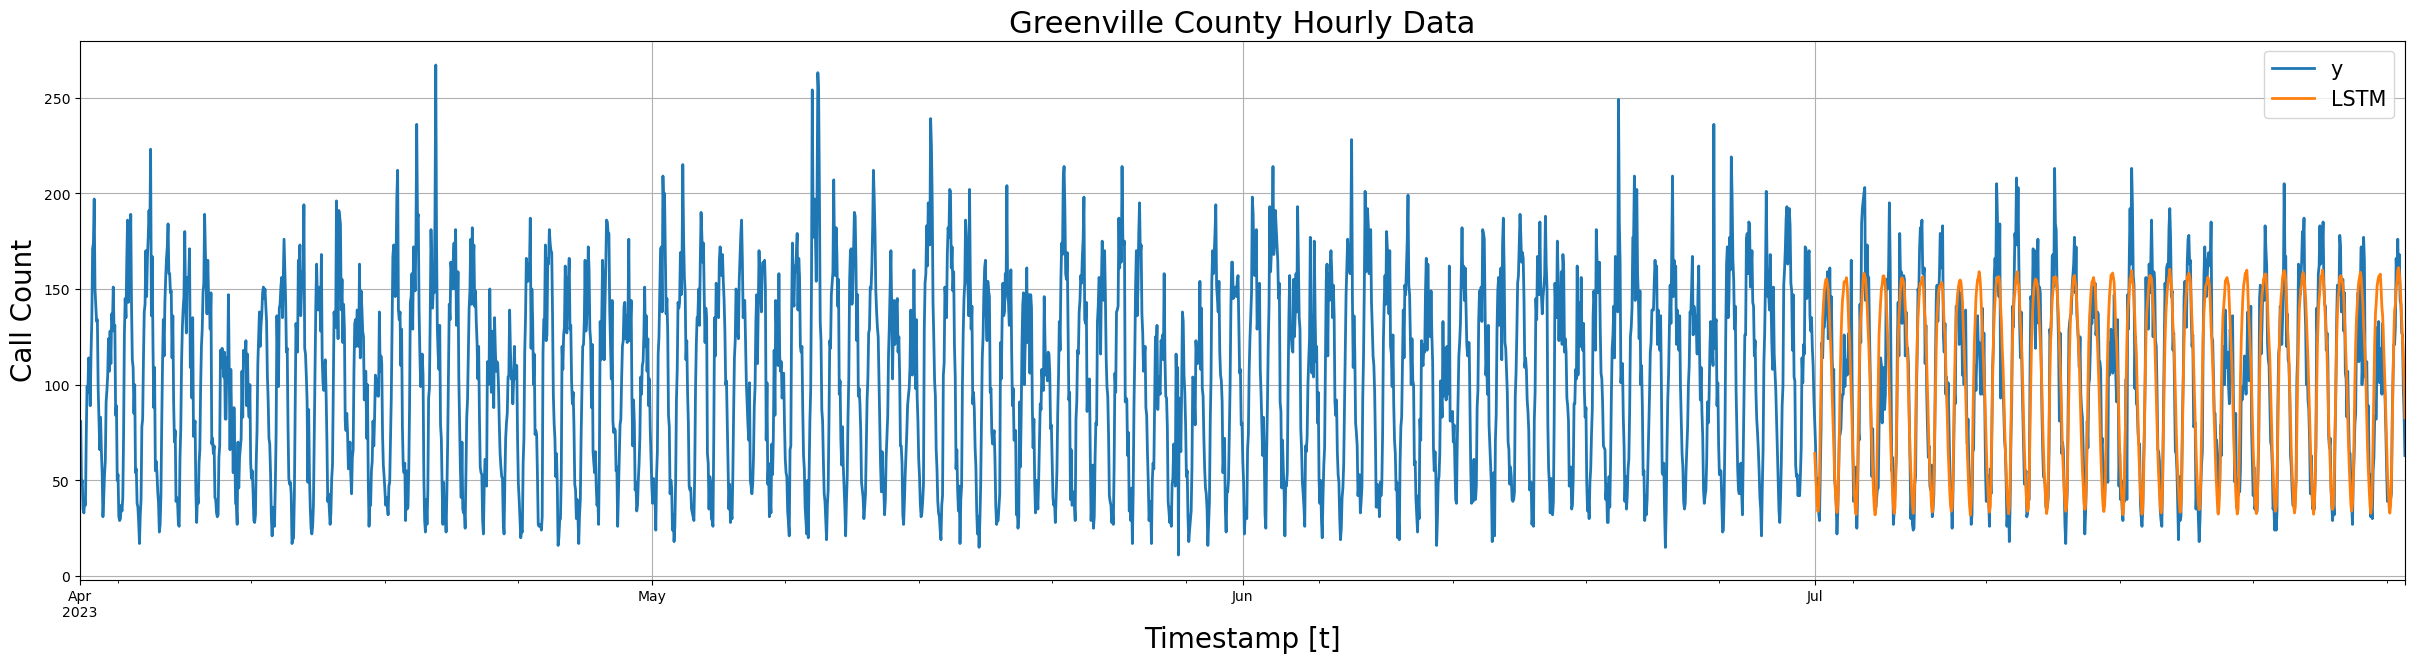

In [22]:
gcoh_model = nf(models=h_models, freq='H')

gcoh_model.fit(tr_gcoh_sf)
gcoh_fcst1 = gcoh_model.predict(futr_df=ts_gcoh_sf)

gcoh_fcst1 = gcoh_fcst1.merge(ts_gcoh_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (30, 7))
plot_df = pd.concat([tr_gcoh_sf, gcoh_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('Greenville County Hourly Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 3      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 1.5 M  | train
5 | mlp_decoder     | MLP              | 2.6 K  | train
-------------------------------------------------------------
2.0 M     Trainable params
3         Non-trainable params
2.0 M     Total params
7.928     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

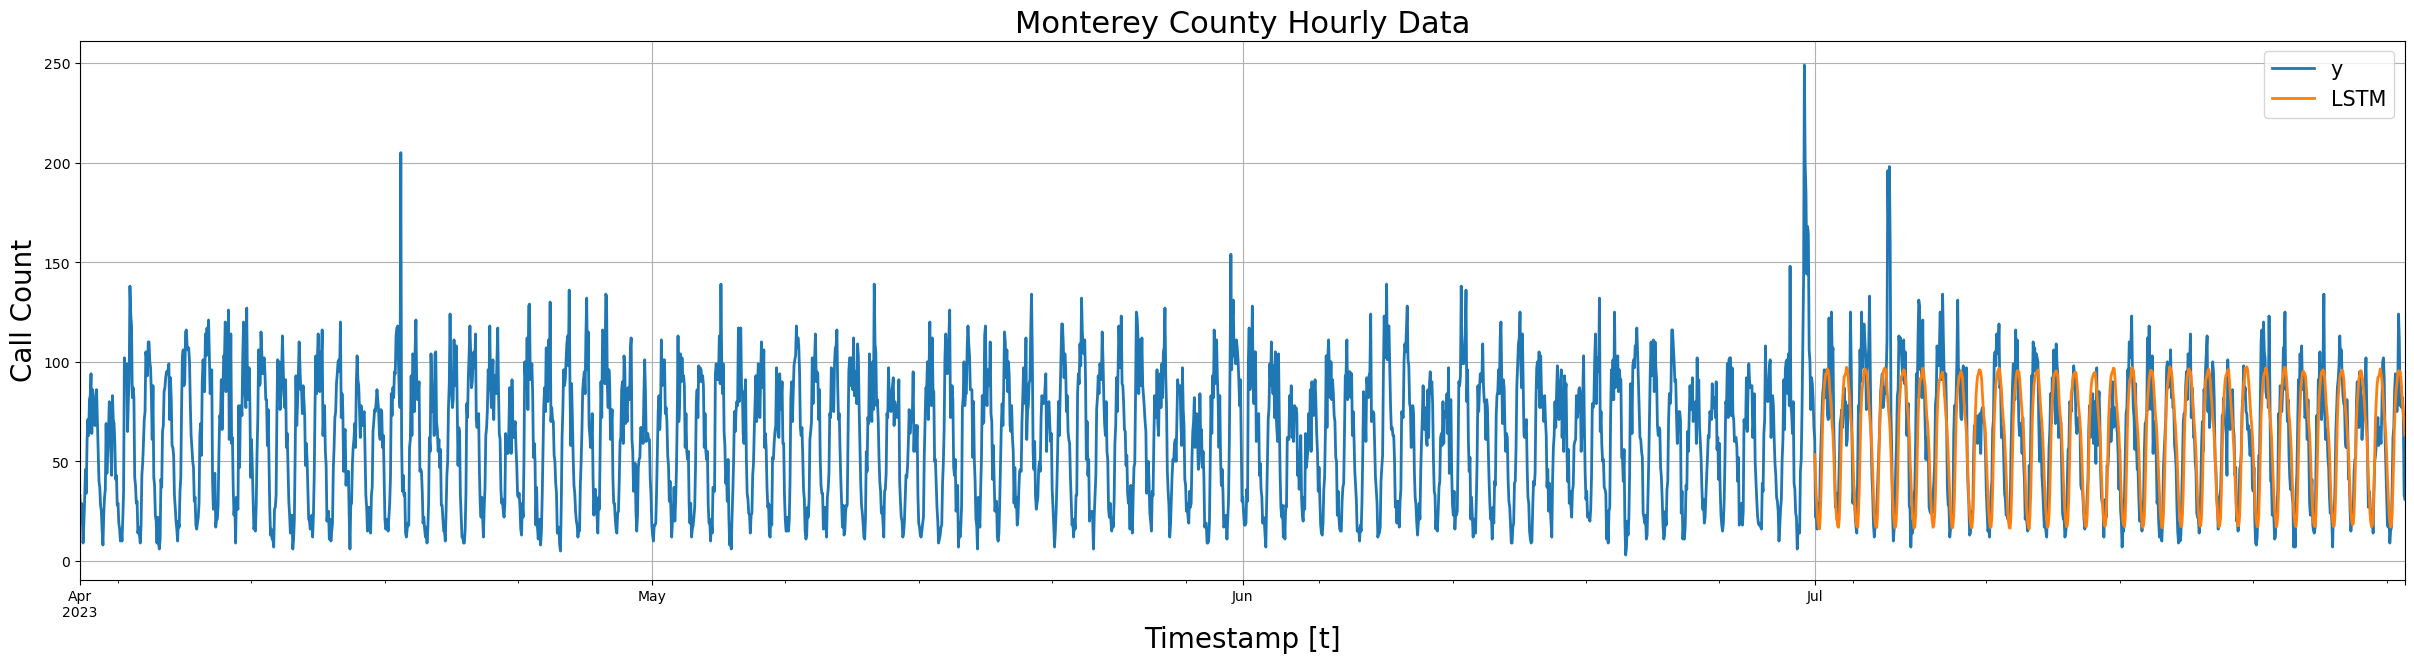

In [23]:
mcoh_model = nf(models=h_models, freq='H')

mcoh_model.fit(tr_mcoh_sf)
mcoh_fcst1 = mcoh_model.predict(futr_df=ts_mcoh_sf)

mcoh_fcst1 = mcoh_fcst1.merge(ts_mcoh_sf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

fig, ax = plt.subplots(1, 1, figsize = (30, 7))
plot_df = pd.concat([tr_mcoh_sf, mcoh_fcst1]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM']].plot(ax=ax, linewidth=2)

ax.set_title('Monterey County Hourly Data', fontsize=22)
ax.set_ylabel('Call Count', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [24]:
from permetrics import RegressionMetric
list_metrics = ["MSE","MAE","MedAE","MAPE", "SMAPE", "MASE", "RMSE", "R2"]

In [25]:
alxm_true = ts_alxm_sf['y'].tolist()
alxm_pred = alxm_fcst1['LSTM'].tolist()

alxm_eval = RegressionMetric(alxm_true, alxm_pred)

alxm_reslist = []

for metric in list_metrics:
    alxm_reslist.append(alxm_eval.get_metric_by_name(metric))

print(alxm_reslist)

[{'MSE': 2443553.108018557}, {'MAE': 1310.6808268229167}, {'MedAE': 1311.447265625}, {'MAPE': 0.06013078653514942}, {'SMAPE': 0.031314549528492275}, {'MASE': 0.9826532916474976}, {'RMSE': 1563.1868436046143}, {'R2': 0.3203003250654276}]


In [26]:
gcom_true = ts_gcom_sf['y'].tolist()
gcom_pred = gcom_fcst1['LSTM'].tolist()

gcom_eval = RegressionMetric(gcom_true, gcom_pred)

gcom_reslist = []

for metric in list_metrics:
    gcom_reslist.append(gcom_eval.get_metric_by_name(metric))

print(gcom_reslist)

[{'MSE': 7740689.3957265215}, {'MAE': 2063.7272135416665}, {'MedAE': 1674.95703125}, {'MAPE': 0.0286258313393673}, {'SMAPE': 0.01417469653376447}, {'MASE': 0.6131759318502061}, {'RMSE': 2782.2094449783112}, {'R2': 0.32721231768794146}]


In [27]:
mcom_true = ts_mcom_sf['y'].tolist()
mcom_pred = mcom_fcst1['LSTM'].tolist()

mcom_eval = RegressionMetric(mcom_true, mcom_pred)

mcom_reslist=[]

for metric in list_metrics:
    mcom_reslist.append(mcom_eval.get_metric_by_name(metric))

print(mcom_reslist)

[{'MSE': 10195966.422920227}, {'MAE': 2473.7513020833335}, {'MedAE': 1681.625}, {'MAPE': 0.05475211778663009}, {'SMAPE': 0.02835671253905026}, {'MASE': 0.9983586851671803}, {'RMSE': 3193.112341105497}, {'R2': -0.8920941098733715}]


In [28]:
alxw_true = ts_alxw_sf['y'].tolist()
alxw_pred = alxw_fcst1['LSTM'].tolist()

alxw_eval = RegressionMetric(alxw_true, alxw_pred)

alxw_reslist = []

for metric in list_metrics:
    alxw_reslist.append(alxw_eval.get_metric_by_name(metric))

print(alxw_reslist)

[{'MSE': 324304.3547966492}, {'MAE': 470.6288076547476}, {'MedAE': 477.2037353515625}, {'MAPE': 0.09577969609211097}, {'SMAPE': 0.05120174442559806}, {'MASE': 2.0261750118514374}, {'RMSE': 569.4772645125082}, {'R2': -0.7500843593059332}]


In [29]:
gcow_true = ts_gcow_sf['y'].tolist()
gcow_pred = gcow_fcst1['LSTM'].tolist()

gcow_eval = RegressionMetric(gcow_true, gcow_pred)

gcow_reslist = []

for metric in list_metrics:
    gcow_reslist.append(gcow_eval.get_metric_by_name(metric))

print(gcow_reslist)

[{'MSE': 1562741.0428833412}, {'MAE': 1039.307373046875}, {'MedAE': 935.6396484375}, {'MAPE': 0.06252873578260348}, {'SMAPE': 0.031088122465728493}, {'MASE': 2.0266374560446057}, {'RMSE': 1250.0964134351163}, {'R2': -1.6134947733293519}]


In [30]:
mcow_true = ts_mcow_sf['y'].tolist()
mcow_pred = mcow_fcst1['LSTM'].tolist()

mcow_eval = RegressionMetric(mcow_true, mcow_pred)

mcow_reslist = []

for metric in list_metrics:
    mcow_reslist.append(mcow_eval.get_metric_by_name(metric))

print(mcow_reslist)

[{'MSE': 863458.0045243776}, {'MAE': 744.8588491586538}, {'MedAE': 646.16552734375}, {'MAPE': 0.07425384244343167}, {'SMAPE': 0.03698656755039306}, {'MASE': 1.6357131117417905}, {'RMSE': 929.2244102069088}, {'R2': -0.46842952791180936}]


In [31]:
alxd_true = ts_alxd_sf['y'].tolist()
alxd_pred = alxd_fcst1['LSTM'].tolist()

alxd_eval = RegressionMetric(alxd_true, alxd_pred)

alxd_reslist = []

for metric in list_metrics:
    alxd_reslist.append(alxd_eval.get_metric_by_name(metric))

print(alxd_reslist)

[{'MSE': 14329.462160452786}, {'MAE': 93.69927029079861}, {'MedAE': 80.23672485351562}, {'MAPE': 0.16033059281263232}, {'SMAPE': 0.07860966330619777}, {'MASE': 0.884049088930465}, {'RMSE': 119.70573152716116}, {'R2': -0.3402225855451786}]


In [33]:
gcod_true = ts_gcod_sf['y'].tolist()
gcod_pred = gcod_fcst1['LSTM'].tolist()

gcod_eval = RegressionMetric(gcod_true, gcod_pred)

gcod_reslist = []

for metric in list_metrics:
    gcod_reslist.append(gcod_eval.get_metric_by_name(metric))

print(gcod_reslist)

[{'MSE': 58863.03647135264}, {'MAE': 199.44293348524306}, {'MedAE': 191.691650390625}, {'MAPE': 0.08681632150058001}, {'SMAPE': 0.04270366242323049}, {'MASE': 0.9498807235076059}, {'RMSE': 242.61705725557022}, {'R2': -0.29772483804039584}]


In [34]:
mcod_true = ts_mcod_sf['y'].tolist()
mcod_pred = mcod_fcst1['LSTM'].tolist()

mcod_eval = RegressionMetric(mcod_true, mcod_pred)

mcod_reslist = []

for metric in list_metrics:
    mcod_reslist.append(mcod_eval.get_metric_by_name(metric))

print(mcod_reslist)

[{'MSE': 55651.784118714306}, {'MAE': 188.78139173719617}, {'MedAE': 158.910888671875}, {'MAPE': 0.13084167972812452}, {'SMAPE': 0.06482934924380725}, {'MASE': 1.211533304341683}, {'RMSE': 235.9063036858369}, {'R2': -0.5965029811663662}]


In [35]:
alxh_true = ts_alxh_sf['y'].tolist()
alxh_pred = alxh_fcst1['LSTM'].tolist()

alxh_eval = RegressionMetric(alxh_true, alxh_pred)

alxh_reslist = []

for metric in list_metrics:
    alxh_reslist.append(alxh_eval.get_metric_by_name(metric))

print(alxh_reslist)

[{'MSE': 102.7767502052236}, {'MAE': 7.670415148940138}, {'MedAE': 6.107463836669922}, {'MAPE': 0.32888891211709315}, {'SMAPE': 0.13371485578155712}, {'MASE': 0.9076474686514607}, {'RMSE': 10.137886870804172}, {'R2': 0.5551755160937015}]


In [37]:
gcoh_true = ts_gcoh_sf['y'].tolist()
gcoh_pred = gcoh_fcst1['LSTM'].tolist()

gcoh_eval = RegressionMetric(gcoh_true, gcoh_pred)

gcoh_reslist = []

for metric in list_metrics:
    gcoh_reslist.append(gcoh_eval.get_metric_by_name(metric))

print(gcoh_reslist)

[{'MSE': 514.1175636052072}, {'MAE': 17.016636163957656}, {'MedAE': 13.172332763671875}, {'MAPE': 0.19416850663738644}, {'SMAPE': 0.08905296210314581}, {'MASE': 0.8937132020796309}, {'RMSE': 22.67416070343525}, {'R2': 0.7701766189208881}]


In [38]:
mcoh_true = ts_mcoh_sf['y'].tolist()
mcoh_pred = mcoh_fcst1['LSTM'].tolist()

mcoh_eval = RegressionMetric(mcoh_true, mcoh_pred)

mcoh_reslist = []

for metric in list_metrics:
    mcoh_reslist.append(mcoh_eval.get_metric_by_name(metric))

print(mcoh_reslist)

[{'MSE': 412.79874333919287}, {'MAE': 15.574372435128817}, {'MedAE': 13.220575332641602}, {'MAPE': 0.32549819641875744}, {'SMAPE': 0.1474843333348615}, {'MASE': 1.1489037648233429}, {'RMSE': 20.317449233090084}, {'R2': 0.5912387224524627}]
